<a href="https://colab.research.google.com/github/pam-lab/JupyterFiles/blob/main/Similarity_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and processing

In [5]:
!git clone https://github.com/language-ml/course-nlp-ir-1-text-exploring

Cloning into 'course-nlp-ir-1-text-exploring'...
remote: Enumerating objects: 401, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 401 (delta 2), reused 0 (delta 0), pack-reused 397
Receiving objects: 100% (401/401), 98.78 MiB | 27.27 MiB/s, done.
Resolving deltas: 100% (197/197), done.
Checking out files: 100% (245/245), done.


In [6]:
import random 
import nltk
import pandas as pd
import codecs
import tqdm

quranic_dir = "/content/course-nlp-ir-1-text-exploring/exploring-datasets/religious_text"
df_quran = pd.read_csv(f'{quranic_dir}/quranic_data/id_text_with_orthographies.txt', sep='\t', header=None)
df_nahj = pd.read_csv(f'{quranic_dir}/nahj-al-balaqa/Nahj Al-Balaqa.txt', sep='\t',header=None)
verse_complete_dict = pd.Series(df_quran[1].tolist(), index=df_quran[0]).to_dict()
nahj_complete_dict = pd.Series(df_nahj[1].tolist(), index=df_nahj[0]).to_dict()

In [7]:
from pathlib import Path
import re
sahife_text=Path(f'{quranic_dir}/Saheefa/sahife_sajjadieh.txt').read_text().split('\n')
sahife_complete_dict = [re.sub('[(][۰-۹]+[)]','', item) for item in sahife_text if item.startswith('(')]

In [8]:
sahife_complete_dict[12]

' حَمْداً یَرْتَفِعُ مِنَّا إِلَی أَعْلَی عِلِّیِّینَ فِي کِتَابٍ مَرْقُومٍ یَشْهَدُه\u200cُ الْمُقَرَّبُونَ. '

In [9]:
nahj_complete_dict['2##186']

'وَ قَالَ ع لِلظّالِمِ الباَدیِ غَداً بِکَفّهِ عَضّةٌ'

In [10]:
verse_complete_dict['2##186']

'وَإِذَا سَأَلَكَ عِبَادِي عَنِّي فَإِنِّي قَرِيبٌ ۖ أُجِيبُ دَعْوَةَ الدَّاعِ إِذَا دَعَانِ ۖ فَلْيَسْتَجِيبُوا لِي وَلْيُؤْمِنُوا بِي لَعَلَّهُمْ يَرْشُدُونَ'

### Normalize

In [11]:
pip install -Uq camel_tools

     |████████████████████████████████| 114 kB 8.4 MB/s 
     |████████████████████████████████| 418 kB 64.4 MB/s 
     |████████████████████████████████| 4.2 MB 63.2 MB/s 
     |████████████████████████████████| 175 kB 71.0 MB/s 
     |████████████████████████████████| 596 kB 70.1 MB/s 
     |████████████████████████████████| 6.6 MB 53.5 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 


In [12]:
from camel_tools.utils.normalize import normalize_unicode
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar

from camel_tools.utils.normalize import normalize_alef_bw
from camel_tools.utils.normalize import normalize_alef_hsb

from camel_tools.utils.normalize import normalize_teh_marbuta_ar
from camel_tools.utils.dediac import dediac_ar

def normalize_arabic(sentence):

    # Normalize alef variants to 'ا'
    sent_norm = normalize_unicode(sentence)
    
    sent_norm = normalize_alef_bw(sent_norm)
    # Normalize alef variants to 'ا'
    sent_norm = normalize_alef_ar(sentence)

    # Normalize alef maksura 'ى' to yeh 'ي'
    sent_norm = normalize_alef_maksura_ar(sent_norm)

    # Normalize teh marbuta 'ة' to heh 'ه'
    sent_norm = normalize_teh_marbuta_ar(sent_norm)
    return dediac_ar(sent_norm)

In [13]:
from camel_tools.utils import normalize


verse_complete_dict_nrmlz = {k:normalize_arabic(v) for k,v in tqdm.tqdm(verse_complete_dict.items())}
nahj_complete_dict_nrmlz = {k:normalize_arabic(v) for k,v in tqdm.tqdm(nahj_complete_dict.items())}
sahife_complete_dict_nrmlz = [normalize_arabic(item) for item in tqdm.tqdm(sahife_complete_dict)]

100%|██████████| 924/924 [00:00<00:00, 9974.20it/s]


In [14]:
print(verse_complete_dict['2##186'])
print(verse_complete_dict_nrmlz['2##186'])

print(nahj_complete_dict['2##186'])
print(nahj_complete_dict_nrmlz['2##186'])

print(sahife_complete_dict[34])
print(sahife_complete_dict_nrmlz[34])

وَإِذَا سَأَلَكَ عِبَادِي عَنِّي فَإِنِّي قَرِيبٌ ۖ أُجِيبُ دَعْوَةَ الدَّاعِ إِذَا دَعَانِ ۖ فَلْيَسْتَجِيبُوا لِي وَلْيُؤْمِنُوا بِي لَعَلَّهُمْ يَرْشُدُونَ
واذا سالك عبادي عني فاني قريب ۖ اجيب دعوه الداع اذا دعان ۖ فليستجيبوا لي وليؤمنوا بي لعلهم يرشدون
وَ قَالَ ع لِلظّالِمِ الباَدیِ غَداً بِکَفّهِ عَضّةٌ
و قال ع للظالم البادی غدا بکفه عضه
 وَ کَاشَفَ فِي الدُّعَاءِ إِلَیْکَ حَامَّتَه‌ُ 
 و کاشف في الدعاء الیک حامته‌ 


In [15]:
quranic_tokenized = [sents.split() for sents in tqdm.tqdm(verse_complete_dict_nrmlz.values())]
nahj_tokenized = [sents.split() for sents in tqdm.tqdm(nahj_complete_dict_nrmlz.values())]
sahife_tokenized = [sents.split() for sents in tqdm.tqdm(sahife_complete_dict_nrmlz)]

100%|██████████| 924/924 [00:00<00:00, 157044.21it/s]


(array([224., 255., 200., 122.,  69.,  32.,  16.,   3.,   2.,   1.]),
 array([  3. ,  13.7,  24.4,  35.1,  45.8,  56.5,  67.2,  77.9,  88.6,
         99.3, 110. ]),
 <a list of 10 Patch objects>)

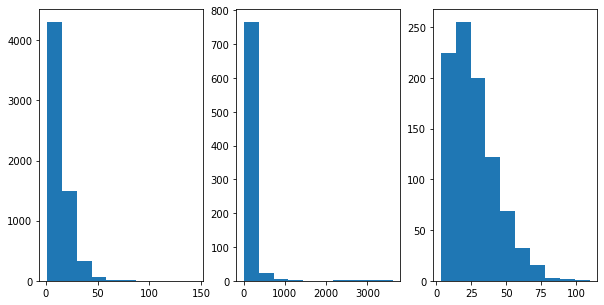

In [16]:
import matplotlib.pyplot as plt
size_quran_token = [len(sentence) for sentence in quranic_tokenized]
size_nahj_token =[len(sentence) for sentence in nahj_tokenized]
size_sahife_token = [len(sentence) for sentence in sahife_tokenized]
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(10,5))
axes[0].hist(size_quran_token)
axes[1].hist(size_nahj_token)
axes[2].hist(size_sahife_token)

In [17]:
pip install transformers -Uqq

In [20]:
from transformers import AutoTokenizer, AutoModel
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Mini:   asafaya/bert-mini-arabic
# Medium: asafaya/bert-medium-arabic
# Base:   asafaya/bert-base-arabic
# Large:  asafaya/bert-large-arabic
# https://www.youtube.com/watch?v=jVPd7lEvjtg

tokenizer = AutoTokenizer.from_pretrained("asafaya/bert-base-arabic")
model = AutoModel.from_pretrained("asafaya/bert-base-arabic")

model=model.to(device)

model.eval()

Some weights of the model checkpoint at asafaya/bert-base-arabic were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(32000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [46]:
import numpy as np
import torch
from torch.utils.data import DataLoader,TensorDataset

batch_values = list(verse_complete_dict_nrmlz.values())

encoding=tokenizer.batch_encode_plus(batch_values,
                    add_special_tokens=True,
                    max_length=128,
                    return_token_type_ids=False,
                    padding='max_length',
                    return_attention_mask=True,
                    truncation=True,
                    return_tensors='pt'
                    )

from torch.utils.data import DataLoader,TensorDataset
dataset=TensorDataset(encoding.input_ids, encoding.attention_mask)
dataloader = DataLoader(dataset,batch_size=128,drop_last=False,shuffle=False)

predictions = []
with torch.no_grad():
    for (input_ids, attention_mask) in dataloader:
        prediction = model(input_ids.to(device),attention_mask.to(device))
        predictions.append(prediction.last_hidden_state)

predictions = torch.cat(predictions,dim=0)

In [49]:
attention_mask=encoding.attention_mask.unsqueeze(-1).expand(predictions.shape).float()
# for filtering out unnecessary ones
mask_embeddings=predictions.cpu() * attention_mask

summed = torch.sum(mask_embeddings,dim=1)
count = torch.clamp(attention_mask.sum(dim=1),min=1e-9)
mean_embedding = summed / count
mean_embedding.shape

from sklearn.metrics.pairwise import cosine_similarity

COMPARE_FROM = 10
mean_embedding = mean_embedding.numpy()
similarity=cosine_similarity(
    [mean_embedding[COMPARE_FROM]],
    mean_embedding 
).squeeze()

most_similar=similarity.argsort()[-10:][::-1]
verse_complete=pd.DataFrame(verse_complete_dict_nrmlz.values())
print(verse_complete.iloc[COMPARE_FROM].values)
pd.set_option('display.max_colwidth', None)

verse_complete.iloc[most_similar]

['والذين يؤمنون بما انزل اليك وما انزل من قبلك وبالاخره هم يوقنون']


,0
10,والذين يؤمنون بما انزل اليك وما انزل من قبلك وبالاخره هم يوقنون
105,ولقد انزلنا اليك ايات بينات ۖ وما يكفر بها الا الفاسقون
3303,الذين اتيناهم الكتاب من قبله هم به يؤمنون
1707,المر ۚ تلك ايات الكتاب ۗ والذي انزل اليك من ربك الحق ولكن اكثر الناس لا يؤمنون
476,فان كذبوك فقد كذب رسل من قبلك جاءوا بالبينات والزبر والكتاب المنير
3735,الم يروا كم اهلكنا قبلهم من القرون انهم اليهم لا يرجعون
3684,وان يكذبوك فقد كذب الذين من قبلهم جاءتهم رسلهم بالبينات وبالزبر وبالكتاب المنير
2133,وبالحق انزلناه وبالحق نزل ۗ وما ارسلناك الا مبشرا ونذيرا
97,واذا قيل لهم امنوا بما انزل الله قالوا نؤمن بما انزل علينا ويكفرون بما وراءه وهو الحق مصدقا لما معهم ۗ قل فلم تقتلون انبياء الله من قبل ان كنتم مؤمنين
4122,ولقد اوحي اليك والي الذين من قبلك لئن اشركت ليحبطن عملك ولتكونن من الخاسرين
